In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sanjeetsinghnaik/la-liga-match-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dasha\.cache\kagglehub\datasets\sanjeetsinghnaik\la-liga-match-data\versions\1


In [3]:
!dir C:\Users\dasha\.cache\kagglehub\datasets\sanjeetsinghnaik\la-liga-match-data\versions\1

 Volume in drive C has no label.
 Volume Serial Number is 8CE8-A359

 Directory of C:\Users\dasha\.cache\kagglehub\datasets\sanjeetsinghnaik\la-liga-match-data\versions\1

01/28/2025  07:26 PM    <DIR>          .
01/28/2025  07:26 PM    <DIR>          ..
01/28/2025  07:26 PM           475,927 combined_data_laliga.csv
01/28/2025  07:26 PM            61,935 laliga2014.csv
01/28/2025  07:26 PM            62,042 laliga2015.csv
01/28/2025  07:26 PM            61,743 laliga2016.csv
01/28/2025  07:26 PM            61,782 laliga2017.csv
01/28/2025  07:26 PM            61,993 laliga2018.csv
01/28/2025  07:26 PM            61,787 laliga2019.csv
01/28/2025  07:26 PM            61,453 laliga2020.csv
               8 File(s)        908,662 bytes
               2 Dir(s)  60,835,098,624 bytes free


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv(path + "/combined_data_laliga.csv")
data.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MÁLAGA,ATHLETIC,1-0,1-0,4.4,6.0,5.7,40,60,...,14.0,9.0,3.0,0.0,0.0,1,0,0,1,2014
1,1,SEVILLA FC,VALENCIA,1-1,1-0,4.7,6.5,6.8,47,53,...,16.0,8.0,2.0,0.0,1.0,1,1,1,1,2014
2,2,GRANADA,DEPORTIVO,2-1,0-1,4.6,7.2,5.9,53,47,...,14.0,26.0,3.0,0.0,0.0,2,1,1,2,2014
3,3,ALMERÍA,ESPANYOL,1-1,0-0,5.6,6.9,5.5,56,44,...,20.0,9.0,3.0,1.0,0.0,1,1,1,1,2014
4,4,EIBAR,REAL SOCIEDAD,1-0,1-0,3.7,6.5,5.9,41,59,...,20.0,14.0,1.0,0.0,0.0,1,0,0,1,2014


In [6]:
data.isna().sum()

Unnamed: 0                       0
Home Team                        0
Away Team                        0
Score                            0
Half Time Score                  0
Match Excitement                 0
Home Team Rating                 0
Away Team Rating                 0
Home Team Possession %           0
Away Team Possession %           0
Home Team Off Target Shots       0
Home Team On Target Shots        0
Home Team Total Shots            0
Home Team Blocked Shots          0
Home Team Corners                0
Home Team Throw Ins              0
Home Team Pass Success %         0
Home Team Aerials Won            0
Home Team Clearances             0
Home Team Fouls                  0
Home Team Yellow Cards           0
Home Team Second Yellow Cards    0
Home Team Red Cards              0
Away Team Off Target Shots       0
Away Team On Target Shots        0
Away Team Total Shots            0
Away Team Blocked Shots          0
Away Team Corners                0
Away Team Throw Ins 

In [7]:
set(data['Home Team'].unique()) == set(data['Away Team'].unique())

True

In [8]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
cat_cols

['Home Team', 'Away Team', 'Score', 'Half Time Score']

In [9]:
data['Home Team Half Time Goals'] = data['Half Time Score'].apply(lambda x: x.split('-')[0]).astype(int)
data['Away Team Half Time Goals'] = data['Half Time Score'].apply(lambda x: x.split('-')[1]).astype(int)

In [10]:
teams = set(data['Home Team'].unique())
t2i = {team: i for i, team in enumerate(teams)}
i2t = {i: team for team, i in t2i.items()}

data['Home Team'] = data['Home Team'].map(t2i)
data['Away Team'] = data['Away Team'].map(t2i)

In [11]:
data.drop(columns=['Half Time Score', 'Score'], inplace=True, errors='ignore')
data.columns

Index(['Unnamed: 0', 'Home Team', 'Away Team', 'Match Excitement',
       'Home Team Rating', 'Away Team Rating', 'Home Team Possession %',
       'Away Team Possession %', 'Home Team Off Target Shots',
       'Home Team On Target Shots', 'Home Team Total Shots',
       'Home Team Blocked Shots', 'Home Team Corners', 'Home Team Throw Ins',
       'Home Team Pass Success %', 'Home Team Aerials Won',
       'Home Team Clearances', 'Home Team Fouls', 'Home Team Yellow Cards',
       'Home Team Second Yellow Cards', 'Home Team Red Cards',
       'Away Team Off Target Shots', 'Away Team On Target Shots',
       'Away Team Total Shots', 'Away Team Blocked Shots', 'Away Team Corners',
       'Away Team Throw Ins', 'Away Team Pass Success %',
       'Away Team Aerials Won', 'Away Team Clearances', 'Away Team Fouls',
       'Away Team Yellow Cards', 'Away Team Second Yellow Cards',
       'Away Team Red Cards', 'Home Team Goals Scored',
       'Away Team Goals Scored', 'Home Team Goals Conceede

In [12]:
def get_match_result(home_goals, away_goals):
    """
    0 -> draw; 1 -> home team won; 2 -> away team won
    """
    if home_goals == away_goals:
        return 0
    elif home_goals > away_goals:
        return 1
    else:
        return 2

data['result'] = data.apply(
    lambda row: get_match_result(
        row['Home Team Goals Scored'], 
        row['Away Team Goals Scored']
    ), 
    axis=1
)

In [13]:
def calculate_team_performance_metrics(data):
    home_wins = data.groupby('Home Team')['result'].apply(lambda x: (x == 1).mean())
    away_wins = data.groupby('Away Team')['result'].apply(lambda x: (x == 2).mean())
    
    team_stats = {}
    for team in set(data['Home Team'].unique()) | set(data['Away Team'].unique()):
        home_matches = data[data['Home Team'] == team]
        away_matches = data[data['Away Team'] == team]
        
        team_stats[team] = {
            'overall_win_rate': (len(home_matches[home_matches['result'] == 1]) + 
                               len(away_matches[away_matches['result'] == 2])) /
                              (len(home_matches) + len(away_matches)),
            'home_win_rate': home_wins.get(team, 0),
            'away_win_rate': away_wins.get(team, 0),
            'home_goals_avg': home_matches['Home Team Goals Scored'].mean(),
            'away_goals_avg': away_matches['Away Team Goals Scored'].mean()
        }
    
    data['home_team_overall_winrate'] = data['Home Team'].map(lambda x: team_stats[x]['overall_win_rate'])
    data['away_team_overall_winrate'] = data['Away Team'].map(lambda x: team_stats[x]['overall_win_rate'])
    data['home_team_home_winrate'] = data['Home Team'].map(lambda x: team_stats[x]['home_win_rate'])
    data['away_team_away_winrate'] = data['Away Team'].map(lambda x: team_stats[x]['away_win_rate'])
    
    return data

data = calculate_team_performance_metrics(data)

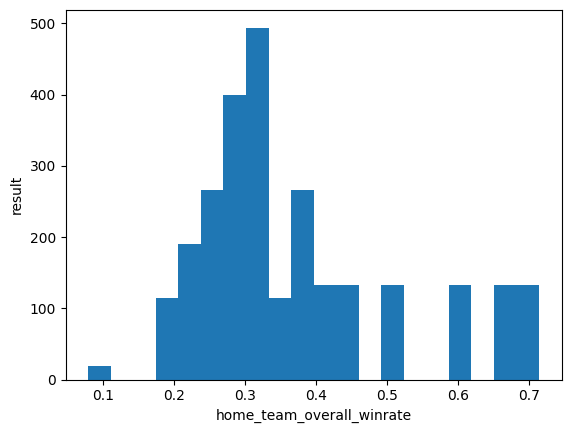

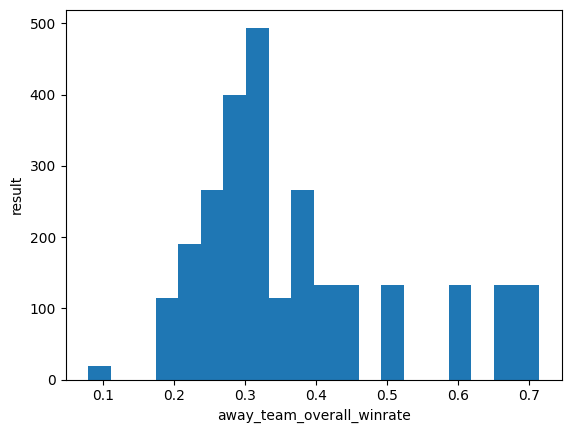

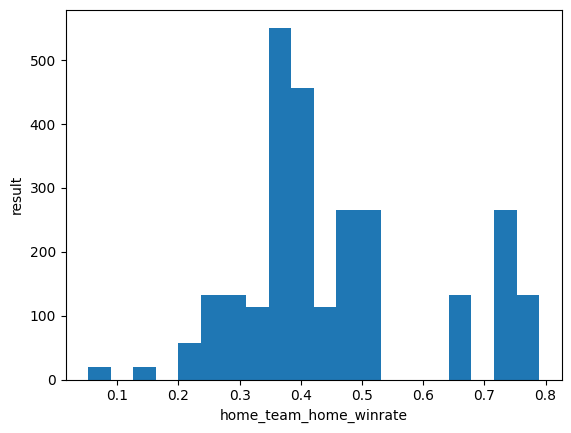

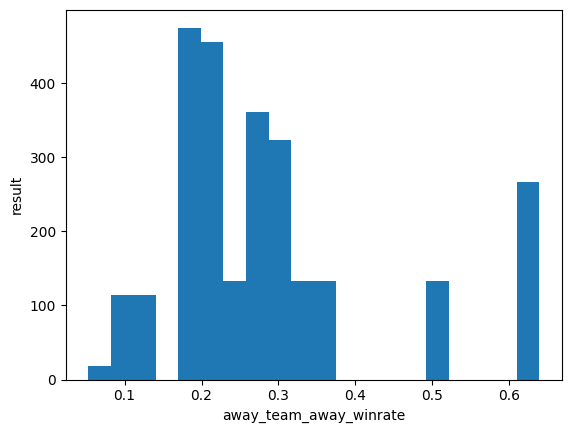

In [14]:
import matplotlib.pyplot as plt
for features in ['home_team_overall_winrate', 'away_team_overall_winrate', 'home_team_home_winrate', 'away_team_away_winrate']:
    data[features].plot(kind='hist', bins=20)
    plt.xlabel(features)
    plt.ylabel('result')
    plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [16]:
train = data[data['year'] < 2020]
test = data[data['year'] == 2020]
x_train, y_train = train.drop(columns=['result', 'Unnamed: 0']), train['result']
x_test, y_test = test.drop(columns=['result', 'Unnamed: 0']), test['result']

In [17]:
columns_to_drop = [
    'Home Team Goals Scored',
    'Away Team Goals Scored',
    'Home Team Goals Conceeded',
    'Away Team Goals Conceeded',
    'result',
    'Unnamed: 0'
]

In [18]:
x_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
x_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [20]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = clf_rf.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_metrics(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
get_metrics(y_test, y_pred)

Accuracy: 0.881578947368421
Precision: 0.8801223941241781
Recall: 0.881578947368421
Confusion matrix:
[[ 79  21   9]
 [  7 150   1]
 [  7   0 106]]


In [26]:
clf_rf.feature_names_in_ == x_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
get_metrics(y_test, y_pred)

Accuracy: 0.9026315789473685
Precision: 0.9015197368421052
Recall: 0.9026315789473685
Confusion matrix:
[[ 86  11  12]
 [  9 149   0]
 [  5   0 108]]


In [39]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(x_train, y_train)
y_pred = ab_clf.predict(x_test)
get_metrics(y_test, y_pred)

C:\Users\dasha\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8657894736842106
Precision: 0.8659211856468769
Recall: 0.8657894736842106
Confusion matrix:
[[ 83  12  14]
 [ 16 142   0]
 [  9   0 104]]


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0]
}
clf = GridSearchCV(GradientBoostingClassifier(),
                    grid,
                    scoring='f1_weighted',
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
clf.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='f1_weighted', verbose=1)

In [41]:
y_pred = clf.predict(x_test)
get_metrics(y_test, y_pred)

Accuracy: 0.9105263157894737
Precision: 0.9093915355789554
Recall: 0.9105263157894737
Confusion matrix:
[[ 87  12  10]
 [  6 152   0]
 [  6   0 107]]


In [42]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.5}

In [43]:
clf.predict_proba(x_test)[0], clf.classes_

(array([8.78469995e-01, 8.08752573e-07, 1.21529196e-01]),
 array([0, 1, 2], dtype=int64))

In [44]:
import pickle
pickle.dump(clf, open('saved_models/model_gb.pkl', 'wb'))

In [45]:
import xgboost as xgb
print(xgb.get_config())

{'use_rmm': False, 'verbosity': 1}


In [46]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

grid = {
    'n_estimators': [ 200, 300],
    'learning_rate': [0.1], #, 0.01, 0.001],
    'max_depth': [3, 5], #, 7],
    'subsample': [0.5, 0.7, 1.0],
    'tree_method': ['hist'],  
    'device': ['cuda']        
}

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',    
    device='cuda'          
)

clf = GridSearchCV(
    xgb_clf,
    grid,
    scoring='f1_weighted', 
    cv=5,
    verbose=3,
    n_jobs=1
)

clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END device=cuda, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.5, tree_method=hist;, score=0.898 total time=   1.5s
[CV 2/5] END device=cuda, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.5, tree_method=hist;, score=0.880 total time=   1.1s
[CV 3/5] END device=cuda, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.5, tree_method=hist;, score=0.908 total time=   1.1s
[CV 4/5] END device=cuda, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.5, tree_method=hist;, score=0.903 total time=   1.0s
[CV 5/5] END device=cuda, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.5, tree_method=hist;, score=0.893 total time=   1.0s
[CV 1/5] END device=cuda, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7, tree_method=hist;, score=0.902 total time=   1.0s
[CV 2/5] END device=cuda, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7, tr

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rat...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'device': ['cuda'], 'learning_rate': [0.1],
                         'max_depth': [3, 5], 'n_estimators': [200, 300],
                         'subsample': [0.5, 0.7, 1.0],
                         'tree_method': ['hist']},
             scoring='f1_weighted', verbose=3)

In [47]:
clf.best_params_

{'device': 'cuda',
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 0.7,
 'tree_method': 'hist'}

In [48]:
y_hat = clf.predict(x_test)
get_metrics(y_test, y_hat)

Accuracy: 0.9263157894736842
Precision: 0.9263999882649768
Recall: 0.9263157894736842
Confusion matrix:
[[ 95   7   7]
 [  9 149   0]
 [  5   0 108]]


In [49]:
import pickle
pickle.dump(clf, open('saved_models/model_xgb.pkl', 'wb'))

In [50]:
import torch
from torch import nn

torch.cuda.is_available()

True

In [51]:
from torch.utils.data import Dataset, DataLoader

class FootballDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values).float()
        self.y = torch.tensor(y.values).long()
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_dataset = FootballDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = FootballDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [52]:
next(iter(train_loader))[0].shape

torch.Size([64, 40])

In [53]:
class FootballPredictor(nn.Module):
    def __init__(self, input_dim):
        super(FootballPredictor, self).__init__()
        self.dropout = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(input_dim, 700)
        self.bn1 = nn.BatchNorm1d(700)
        
        self.fc2 = nn.Linear(700, 500)
        self.bn2 = nn.BatchNorm1d(500)
        
        self.fc3 = nn.Linear(500, 64)
        self.bn3 = nn.BatchNorm1d(64)
        
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        
        self.fc5 = nn.Linear(32, 3)
    
    def forward(self, x):
        x = self.dropout(torch.relu(self.bn1(self.fc1(x))))
        x = self.dropout(torch.relu(self.bn2(self.fc2(x))))
        x = self.dropout(torch.relu(self.bn3(self.fc3(x))))
        x = self.dropout(torch.relu(self.bn4(self.fc4(x))))
        x = self.fc5(x)
        return x
    

In [83]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = FootballPredictor(x_train.shape[1]).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        mode='min',
        factor=0.9,
        patience=10,
        verbose=True
    )

In [84]:
def train(model, train_loader, criterion, optimizer, epochs=10):
    best_loss = float('inf')
    best_model_state = None
    losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0.0
        num_batches = 0
        
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            logits = model(x)
            loss = criterion(logits, y.long())
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            num_batches += 1

        
        avg_epoch_loss = epoch_loss / num_batches
        
        scheduler.step(avg_epoch_loss)
        
        if avg_epoch_loss < best_loss:
            best_loss = avg_epoch_loss
            best_model_state = model.state_dict().copy()
            
        if epoch % 10 == 0:
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch: {epoch}, Loss: {avg_epoch_loss:.4f}, Best Loss: {best_loss:.4f}, LR: {current_lr:.6f}")
        
        losses.append(avg_epoch_loss)
    
    model.load_state_dict(best_model_state)
    print(f"Training completed. Best loss: {best_loss:.4f}")
    return losses

losses = train(model, train_loader, criterion, optimizer, epochs=801)

Epoch: 0, Loss: 0.9515, Best Loss: 0.9515, LR: 0.020000
Epoch: 10, Loss: 0.3976, Best Loss: 0.3976, LR: 0.020000
Epoch: 20, Loss: 0.3924, Best Loss: 0.3786, LR: 0.020000
Epoch: 30, Loss: 0.3624, Best Loss: 0.3484, LR: 0.020000
Epoch: 40, Loss: 0.2894, Best Loss: 0.2894, LR: 0.020000
Epoch: 50, Loss: 0.3179, Best Loss: 0.2775, LR: 0.020000
Epoch: 60, Loss: 0.2861, Best Loss: 0.2775, LR: 0.018000
Epoch: 70, Loss: 0.2826, Best Loss: 0.2701, LR: 0.018000
Epoch: 80, Loss: 0.2822, Best Loss: 0.2436, LR: 0.018000
Epoch: 90, Loss: 0.2323, Best Loss: 0.2280, LR: 0.018000
Epoch: 100, Loss: 0.2270, Best Loss: 0.2202, LR: 0.018000
Epoch: 110, Loss: 0.1886, Best Loss: 0.1798, LR: 0.018000
Epoch: 120, Loss: 0.2063, Best Loss: 0.1798, LR: 0.016200
Epoch: 130, Loss: 0.1733, Best Loss: 0.1733, LR: 0.016200
Epoch: 140, Loss: 0.1812, Best Loss: 0.1733, LR: 0.016200
Epoch: 150, Loss: 0.1522, Best Loss: 0.1522, LR: 0.014580
Epoch: 160, Loss: 0.1557, Best Loss: 0.1325, LR: 0.014580
Epoch: 170, Loss: 0.1589,

In [85]:
y_pred = []
y_true = []
model.eval()
with torch.no_grad():
    for x, y in test_loader:
        logits = model(x.to(device))
        y_pred.extend(torch.argmax(logits, 1).tolist())
        y_true.extend(y.tolist())

get_metrics(y_true, y_pred)

Accuracy: 0.8657894736842106
Precision: 0.8688487488290343
Recall: 0.8657894736842106
Confusion matrix:
[[ 87  13   9]
 [ 14 144   0]
 [ 15   0  98]]


<Axes: >

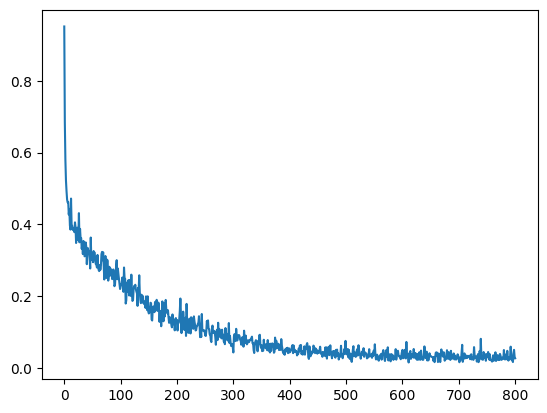

In [86]:
import seaborn as sns
sns.lineplot(x=range(len(losses)), y=losses)

In [70]:
torch.save(model.state_dict(), 'saved_models/model_nn.pth')